# Machine Learning Nanodegree

## Capstone Project

## Stock Market Prediction using RNN(LSTM Model)

---
This project is to used to predict future closing value of a given stock accurately across a given period of time in the future. This project uses RNN(Long Short Term Memory) Networks to predict the closing price of prices of a given stock after analysing the historical dataset of newyork stock exchange collected from kaggle.For this project we will predict closing price of google stock for any given date after training.


### The Road Map Ahead

Notebook is broken down with Several Steps.Please use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets and Exploratory Analysis 
* [Step 1](#step1): Preprocess the data
* [Step 2](#step2): BenchMark Model: Linear Regression for stock pediction
* [Step 3](#step3): Basic and Improved RNN Long-Sort Term Memory Model 
* [Step 4](#step4): Robustness

---
<a id='step0'></a>
## Step 0: Import Datasets

### Import New York(kaggle) Stock Market Dataset

We import a dataset of New York Stock Market from Kaggle. We will analyze the variables with the  use of the scikit-learn library:

- Analysis each of the kaggle datsets to understand which dataset is useful for stock prediction
- prices.csv & prices-adjusted.csv can be used for stock Prediction,but i am using adjusted prices for analysis.


In [98]:
#import libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import datetime
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from math import sqrt
import random
random.seed(0)

In [99]:
#Import fundamental.csv To check this datasets can be used for stock market prediction.
dataset_fundamentals = pd.read_csv("C:/Users/iamku/Downloads/Capstone/datasets/fundamentals.csv")
dataset_fundamentals.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [100]:
#Import fsecurities.csv :To check this datasets can be used for stock market prediction.
dataset_securities = pd.read_csv("C:/Users/iamku/Downloads/Capstone/datasets/securities.csv")
dataset_securities.head()

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877


In [102]:
#Import prices.csv Dataset to check this datasets can be used for stock market prediction.
dataset_prices = pd.read_csv("datasets/prices.csv")
dataset_prices.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [103]:
#Import prices-split-adjusted.csv Dataset to check this datasets can be used for stock market prediction.
df = pd.read_csv("C:/Users/iamku/Downloads/Capstone/datasets/prices-split-adjusted.csv")
df.head()

,Date,Symbol,Open,Close,Low,High,Volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


### Analysis on the Dataset: prices-split-adjusted

Look like,This datasets contains several companies stock prices. The Scope of this project is predict the google stock prices, So we will create a new file :google_data.csv for future use, which contains only google stock prices.

In [104]:
#Check total number of symbol used in the dataframe.
Symbol = list(set(df.Symbol))
len(Symbol)

501

In [105]:
#There are total number of 501 symbol are used .Check few symbols
Symbol[:10]

['HAR', 'CI', 'ES', 'WMT', 'CTAS', 'VLO', 'HUM', 'APA', 'VNO', 'FIS']

In [106]:
#Check for google stcock in the dataset.
df=df[df.Symbol=='GOOGL']
df.head()

,Date,Symbol,Open,Close,Low,High,Volume
440,2010-01-04,GOOGL,313.788792,313.688694,312.432438,315.070073,3908400.0
908,2010-01-05,GOOGL,313.903904,312.307316,311.081089,314.234226,6003300.0
1376,2010-01-06,GOOGL,313.243260,304.434452,303.483494,313.243260,7949400.0
1844,2010-01-07,GOOGL,305.005009,297.347355,296.621617,305.305302,12815700.0
2312,2010-01-08,GOOGL,296.296299,301.311314,294.849857,301.926945,9439100.0


In [107]:
#For further analysis, removing the symbol from it, as it contains onlhy one symbol.
df_stock = df[df.Symbol == 'GOOGL'].copy()
df_stock.drop(['Symbol'],1,inplace=True)
df_stock=df_stock.sort_values('Date')
df_stock.head()


,Date,Open,Close,Low,High,Volume
440,2010-01-04,313.788792,313.688694,312.432438,315.070073,3908400.0
908,2010-01-05,313.903904,312.307316,311.081089,314.234226,6003300.0
1376,2010-01-06,313.243260,304.434452,303.483494,313.243260,7949400.0
1844,2010-01-07,305.005009,297.347355,296.621617,305.305302,12815700.0
2312,2010-01-08,296.296299,301.311314,294.849857,301.926945,9439100.0


In [108]:
df_stockk = df_stock.Close.values.astype('float32')
df_stockk = df_stockk.reshape(1762, 1)
df_stockk.shape

(1762, 1)

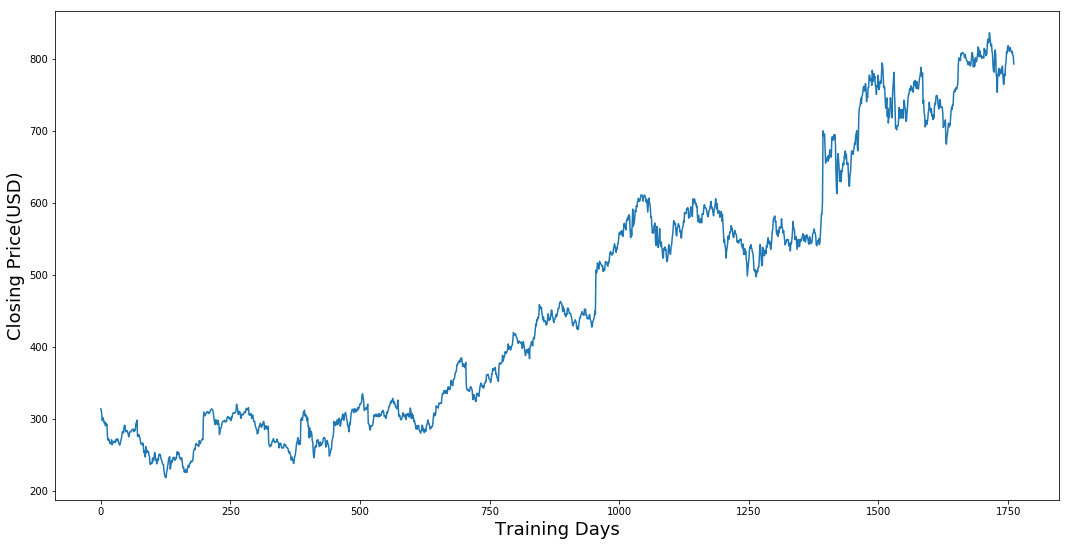

In [195]:
#Analysis of datasets.Plot between Closing Prices vs Training Days
plt.figure(figsize = (18,9))
plt.plot(df_stockk)
plt.xlabel('Training Days',fontsize=18)
plt.ylabel('Closing Price(USD)',fontsize=18)
plt.show()

In [110]:
#Create new csv file which conatins only google stock
df_stock.to_csv('datasets\google.csv',index=False)

---
<a id='step1'></a>
## Step 1: Pre-process the Data

I will preprocess the data on the google_data which is easier of analyze. I will also check for any null records in the datasets.I will normalize the datasets and generate pre-processed file for analysis.

In [48]:
import pandas as pd
import numpy as np
data = pd.read_csv('C:/Users/iamku/Downloads/Capstone/datasets/google.csv')
data.head()


,Date,Open,Close,Low,High,Volume
0,2010-01-04,313.788792,313.688694,312.432438,315.070073,3908400.0
1,2010-01-05,313.903904,312.307316,311.081089,314.234226,6003300.0
2,2010-01-06,313.243260,304.434452,303.483494,313.243260,7949400.0
3,2010-01-07,305.005009,297.347355,296.621617,305.305302,12815700.0
4,2010-01-08,296.296299,301.311314,294.849857,301.926945,9439100.0


In [214]:
#TCheck If there is no null value in the dataset.
missing_values = data.isnull().sum()
missing_values

Date      0
Open      0
Close     0
Low       0
High      0
Volume    0
dtype: int64

In [215]:
#Mean,standard deviation,max and min value from the datasets
print("Open   --mean :-", np.mean(data['Open']),  "  \t Std:- ", np.std(data['Open']),  "  \t Max:- ", np.max(data['Open']),  "  \t Min:- ", np.min(data['Open']))
print("High   --mean :-", np.mean(data['High']),  "  \t Std:- ", np.std(data['High']),  "  \t Max:- ", np.max(data['High']),  "  \t Min:- ", np.min(data['High']))
print("Low    --mean :-", np.mean(data['Low']),   "  \t Std:- ", np.std(data['Low']),   "  \t Max:- ", np.max(data['Low']),   "  \t Min:- ", np.min(data['Low']))
print("Close  --mean :-", np.mean(data['Close']), "  \t Std:- ", np.std(data['Close']), "  \t Max:- ", np.max(data['Close']), "  \t Min:- ", np.min(data['Close']))
print("Volume --mean :-", np.mean(data['Volume']),"  \t Std:- ", np.std(data['Volume']),"  \t Max:- ", np.max(data['Volume']),"  \t Min:- ", np.min(data['Volume']))

Open   --mean :- 467.29659870854204   	 Std:-  181.29237288648238   	 Max:-  838.5   	 Min:-  219.374377378
High   --mean :- 471.042921283454   	 Std:-  182.5567358264972   	 Max:-  839.0   	 Min:-  221.361361362
Low    --mean :- 463.0375826540897   	 Std:-  179.71612530210373   	 Max:-  829.039978   	 Min:-  217.03203103099997
Close  --mean :- 467.0889770754671   	 Std:-  181.17173483336262   	 Max:-  835.73999   	 Min:-  218.253252753
Volume --mean :- 4096042.905788876   	 Std:-  2883604.481600922   	 Max:-  29619900.0   	 Min:-  520600.0


In [4]:
#Print the dataframe head and tail
stocks.head()

,Item,Open,Close,Volume
0,0,803.210022,792.450012,1728300.0
1,1,802.330017,802.880005,1056500.0
2,2,813.330017,804.570007,1199700.0
3,3,808.679993,809.929993,974400.0
4,4,808.010010,807.799988,764100.0


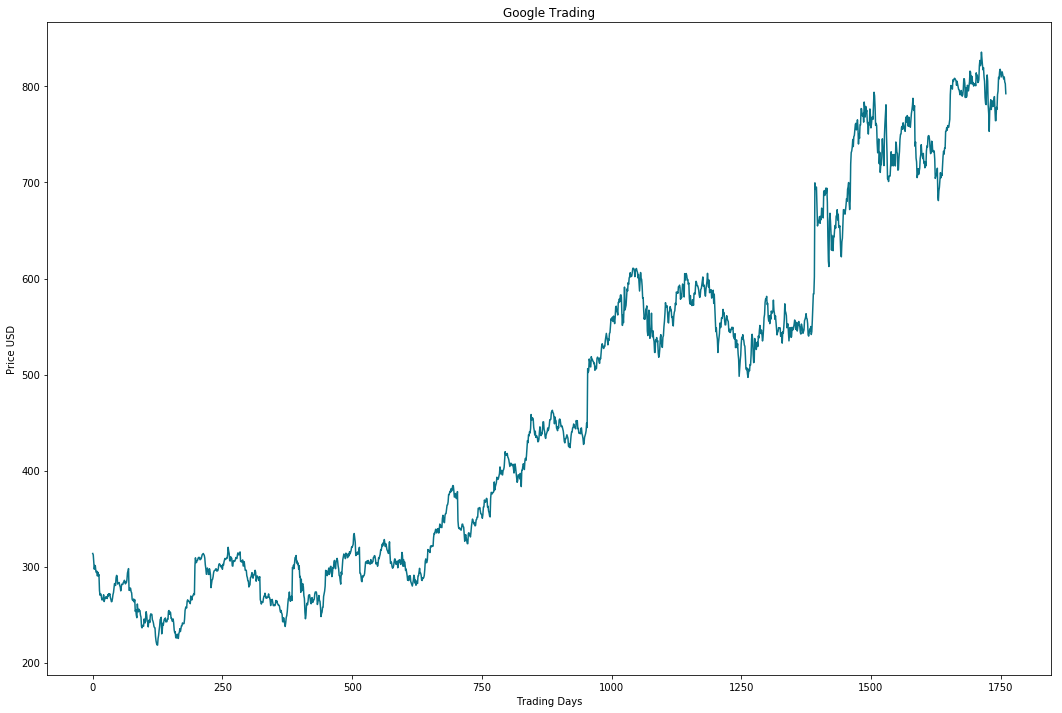

In [31]:
import visualize

visualize.plot_basic(stocks)

In [34]:
def get_normalised_data(data):
    """
    Normalises the data values using MinMaxScaler from sklearn
    :param data: a DataFrame with columns as  ['index','Open','Close','Volume']
    :return: a DataFrame with normalised value for all the columns except index
    """
    # Initialize a scaler, then apply it to the features
    scaler = MinMaxScaler()
    numerical = ['Open', 'Close', 'Volume']
    data[numerical] = scaler.fit_transform(data[numerical])

    return data

In [47]:

#Print the dataframe head and tail
print(stocks.head())
print("---")
print(stocks.tail())

   Item      Open     Close    Volume
0     0  0.152504  0.154561  0.100452
1     1  0.152682  0.152326  0.173853
2     2  0.151616  0.139565  0.241862
3     3  0.138307  0.128099  0.412266
4     4  0.124255  0.134512  0.293884
---
      Item      Open     Close    Volume
1756  1756  0.950753  0.954752  0.017086
1757  1757  0.951836  0.958202  0.031798
1758  1758  0.959346  0.949521  0.048492
1759  1759  0.941579  0.946785  0.037491
1760  1760  0.943001  0.929894  0.084925


In [203]:

print(stocks.head())

print("\n")
print("Open   --- mean :", np.mean(stocks['Open']),  "  \t Std: ", np.std(stocks['Open']),  "  \t Max: ", np.max(stocks['Open']),  "  \t Min: ", np.min(stocks['Open']))
print("Close  --- mean :", np.mean(stocks['Close']), "  \t Std: ", np.std(stocks['Close']), "  \t Max: ", np.max(stocks['Close']), "  \t Min: ", np.min(stocks['Close']))
print("Volume --- mean :", np.mean(stocks['Volume']),"  \t Std: ", np.std(stocks['Volume']),"  \t Max: ", np.max(stocks['Volume']),"  \t Min: ", np.min(stocks['Volume']))

       Open     Close    Volume
0  0.123901  0.000000  0.606442
1  0.000000  0.174601  1.000000
2  0.010989  0.112263  0.921928
3  0.093132  0.291229  0.575381
4  0.243819  0.430228  0.366556


Open   --- mean : 0.4581783601014362   	 Std:  0.3284300493477893   	 Max:  1.0   	 Min:  0.0
Close  --- mean : 0.5593318153678267   	 Std:  0.32674858393972517   	 Max:  1.0   	 Min:  0.0
Volume --- mean : 0.48950140398584724   	 Std:  0.2515292140876965   	 Max:  1.0   	 Min:  0.0


### Visualization after normalization 



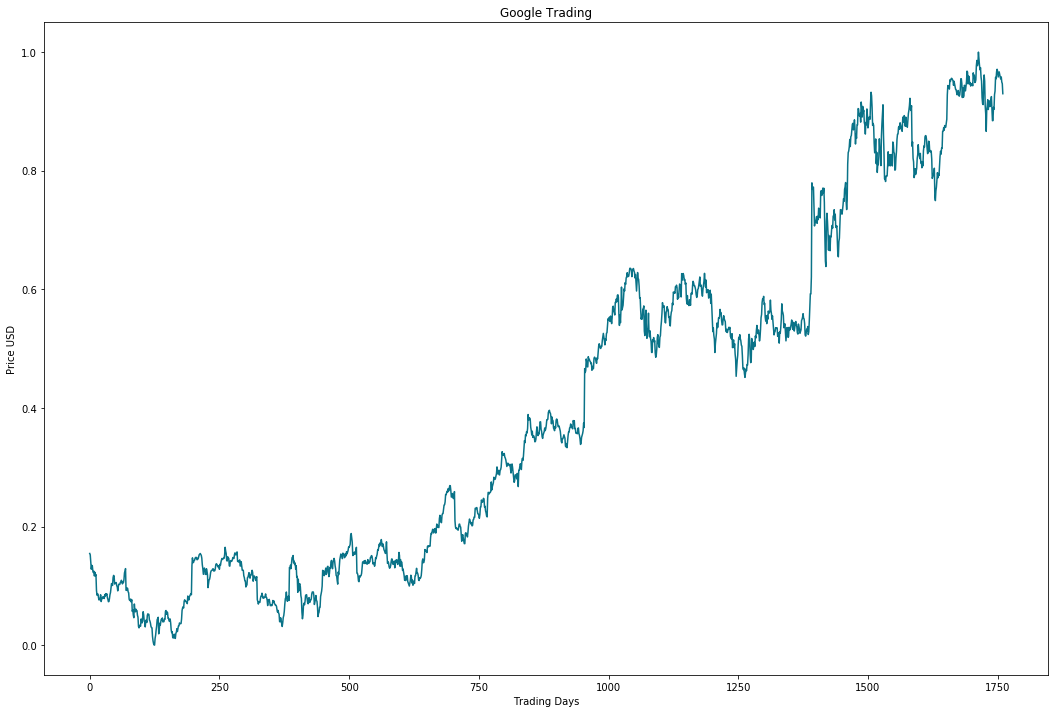

In [38]:
import visualize

visualize.plot_basic(stocks)

In [128]:
stocks.to_csv('datasets/preprocessed_data_google.csv',index= False)

---
<a id='step2'></a>
## Step 2: Bench Mark Model

In this section, we use a basic machine learning model like regression model and find the accuracy of the model.

In [167]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
stocks = pd.read_csv("datasets/preprocessed_data_google.csv")
display(stocks.head())

,Item,Open,Close,Volume
0,0,0.943000,0.929893,0.041503
1,1,0.941579,0.946784,0.018416
2,2,0.959346,0.949521,0.023337
3,3,0.951835,0.958202,0.015595
4,4,0.950753,0.954752,0.008368


### Pre-process the Data

Pre-processing of data in which we split the datsets into training set. and testing set

In [168]:
import visualize as vs
import stock_data as sd
X_train, X_test, y_train, y_test, label_range= sd.train_test_split_linear_regression(stocks)

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)


x_train (1207, 1)
y_train (1207, 1)
x_test (555, 1)
y_test (555, 1)


### Making Predictions with Regression Model



In [169]:
def build_model(X, y):
    """
    build a linear regression model using sklearn.linear_model
    :param X: Feature dataset
    :param y: label dataset
    :return: a linear regression model
    """
    linear_mod = linear_model.LinearRegression()  # defining the linear regression model
    X = np.reshape(X, (X.shape[0], 1))
    y = np.reshape(y, (y.shape[0], 1))
    linear_mod.fit(X, y)  # fitting the data points in the model

    return linear_mod

In [170]:
model=build_model(X_train,y_train)

In [171]:
def predict_prices(model, x, label_range):
    """
    Predict the label for given test sets
    :param model: a linear regression model
    :param x: testing features
    :param label_range: normalised range of label data
    :return: predicted labels for given features
    """
    x = np.reshape(x, (x.shape[0], 1))
    predicted_price = model.predict(x)
    predictions_rescaled, re_range = sd.scale_range(predicted_price, input_range=[-1.0, 1.0], target_range=label_range)

    return predictions_rescaled.flatten()

In [172]:
predictions = predict_prices(model,X_test, label_range)

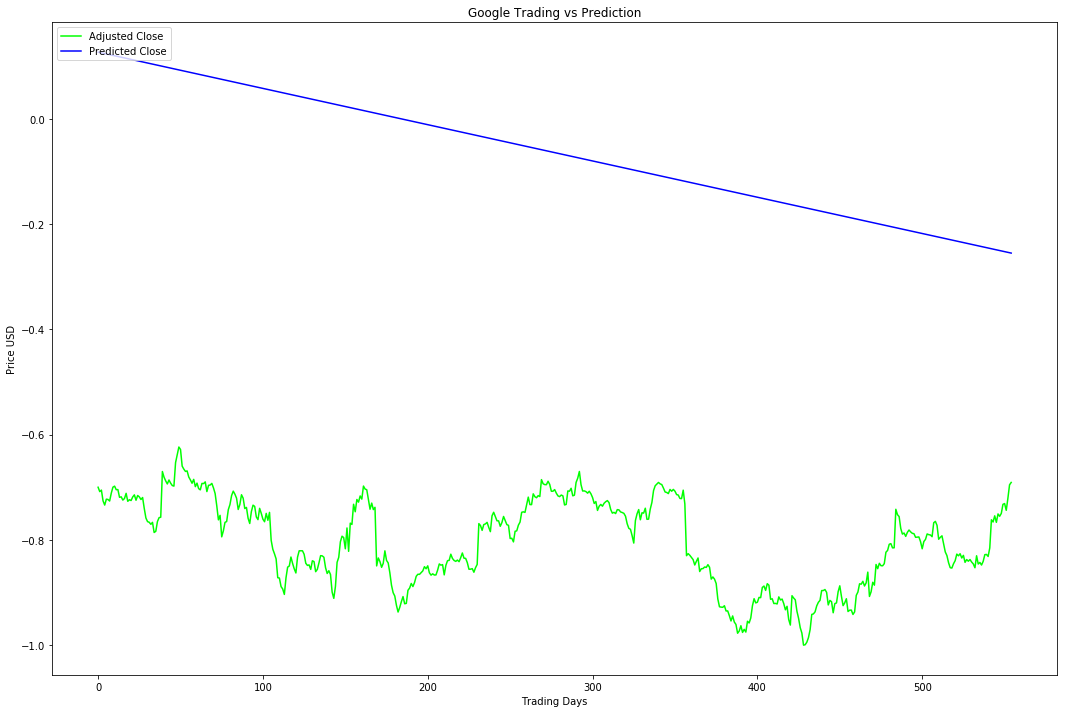

In [173]:
vs.plot_prediction(y_test,predictions)

In [174]:
#once we have make a predictions we have find the model accuracy.
trainScore = mean_squared_error(X_train, y_train)
print('Train Score: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = mean_squared_error(predictions, y_test)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.9483 MSE (0.9738 RMSE)
Test Score: 0.55686805 MSE (0.74623592 RMSE)


### Analysis

From the above two model, the accuracy is about 50% . Stock market is very volatile and there is lots of randomness present in it. We need a model which can give better accuracy and also handle randomness bit. It is difficult to handle the market price accurately but accuracy around 80% will be better model and help us to understand stock prices better. So we have moved to the Deep learning which can be better accuracy.


---
<a id='step3'></a>
## Step 3: Create a RNN model to Predict Stock Prices 

We will first import the keras library and build a RNN model with Keras package.


In [175]:
# Importing the Keras libraries and packages
import math
import pandas as pd
import numpy as np
from IPython.display import display

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

import lstm, time #helper libraries

import visualize as vs
import stock_data as sd




In [176]:
stocks = pd.read_csv('datasets/preprocessed_data_google.csv')
stocks_data = stocks.drop(['Item'], axis =1)

display(stocks_data.head())


,Open,Close,Volume
0,0.943000,0.929893,0.041503
1,0.941579,0.946784,0.018416
2,0.959346,0.949521,0.023337
3,0.951835,0.958202,0.015595
4,0.950753,0.954752,0.008368


In [177]:
# Initialising the RNN
model = Sequential()

In [180]:
X_train, X_test,y_train, y_test = sd.train_test_split_lstm(stocks_data, 5)

unroll_length = 30
X_train = sd.unroll(X_train, unroll_length)
X_test = sd.unroll(X_test, unroll_length)
y_train = y_train[-X_train.shape[0]:]
y_test = y_test[-X_test.shape[0]:]

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (1226, 30, 3)
y_train (1226,)
x_test (466, 30, 3)
y_test (466,)


In [181]:
# build basic lstm model
model = lstm.build_basic_model(input_dim = X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.04686784744262695


In [182]:
model.fit(X_train,y_train,epochs=1,validation_split=0.05)

Train on 1164 samples, validate on 62 samples
Epoch 1/1
1164/1164 [==============================] - 5s - loss: 0.0361 - val_loss: 0.0017


In [183]:
predictions = model.predict(X_test)

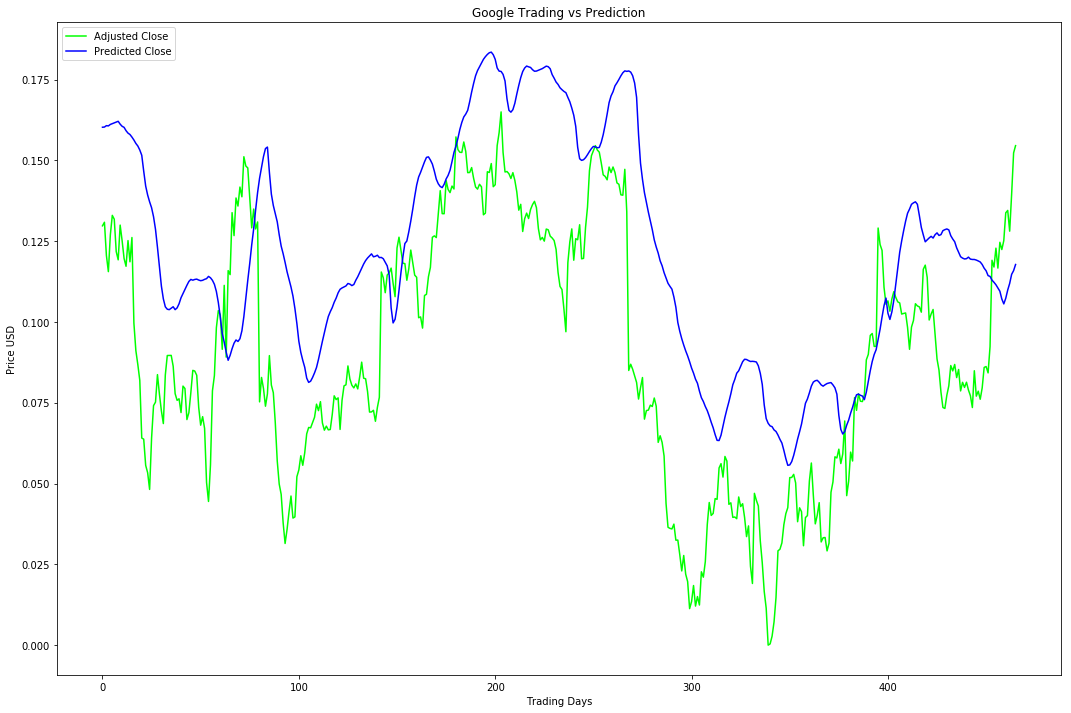

In [184]:
vs.plot_lstm_prediction(y_test,predictions)

In [185]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00262154 MSE (0.05120101 RMSE)
Test Score: 0.00169895 MSE (0.04121831 RMSE)


In [196]:
# Set up hyperparameters
batch_size = 100
epochs = 20

# build improved lstm model
model = lstm.build_improved_model( X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

start = time.time()
#final_model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.0740971565246582


In [197]:
model.fit(X_train, 
          y_train, 
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.05
         )

Train on 1164 samples, validate on 62 samples
Epoch 1/20
7s - loss: 0.1198 - val_loss: 0.0055
Epoch 2/20
3s - loss: 0.0132 - val_loss: 0.0062
Epoch 3/20
4s - loss: 0.0067 - val_loss: 0.0014
Epoch 4/20
4s - loss: 0.0048 - val_loss: 0.0014
Epoch 5/20
3s - loss: 0.0039 - val_loss: 0.0010
Epoch 6/20
3s - loss: 0.0031 - val_loss: 0.0012
Epoch 7/20
4s - loss: 0.0034 - val_loss: 0.0011
Epoch 8/20
4s - loss: 0.0032 - val_loss: 0.0010
Epoch 9/20
3s - loss: 0.0032 - val_loss: 9.7382e-04
Epoch 10/20
3s - loss: 0.0031 - val_loss: 0.0010
Epoch 11/20
3s - loss: 0.0032 - val_loss: 9.8459e-04
Epoch 12/20
4s - loss: 0.0032 - val_loss: 9.3509e-04
Epoch 13/20
4s - loss: 0.0030 - val_loss: 9.4401e-04
Epoch 14/20
3s - loss: 0.0031 - val_loss: 9.1796e-04
Epoch 15/20
4s - loss: 0.0031 - val_loss: 8.9572e-04
Epoch 16/20
3s - loss: 0.0031 - val_loss: 8.9309e-04
Epoch 17/20
3s - loss: 0.0028 - val_loss: 8.8553e-04
Epoch 18/20
3s - loss: 0.0029 - val_loss: 8.7586e-04
Epoch 19/20
3s - loss: 0.0029 - val_loss: 8.6

In [190]:
# Generate predictions 
predictions = model.predict(X_test, batch_size=batch_size)

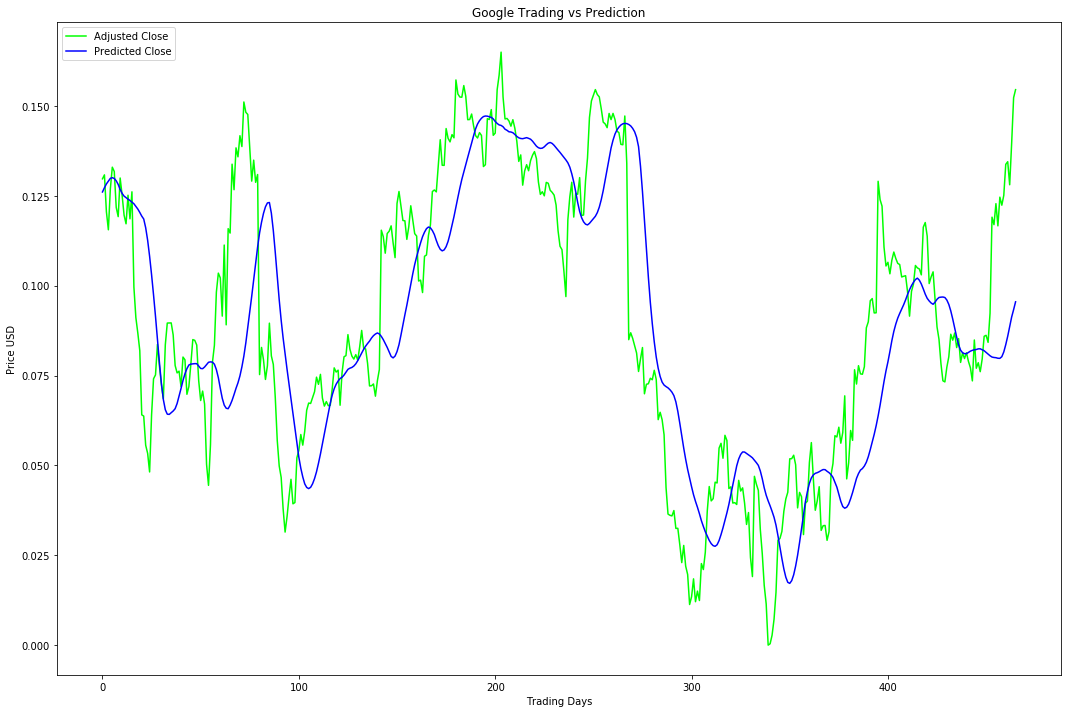

In [191]:
vs.plot_lstm_prediction(y_test,predictions)

In [199]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00140906 MSE (0.03753746 RMSE)
Test Score: 0.00077077 MSE (0.02776274 RMSE)


In [200]:
range = [np.amin(stocks_data['Close']), np.amax(stocks_data['Close'])]

#Calculate the stock price delta in $

true_delta = testScore*(range[1]-range[0])
print('Delta Price: %.6f - RMSE * Adjusted Close Range' % true_delta)    

Delta Price: 0.000771 - RMSE * Adjusted Close Range


### Train the Model

In [201]:
import preprocess_data as ppd

data = pd.read_csv('datasets/new_google_data_2017.csv')

stocks = ppd.remove_data(data)

stocks = ppd.get_normalised_data(stocks)

stocks = stocks.drop(['Item'], axis = 1)
#Print the dataframe head and tail
print(stocks.head())

X = stocks[:].as_matrix()
Y = stocks[:]['Close'].as_matrix()

X = sd.unroll(X,1)
Y = Y[-X.shape[0]:]

print(X.shape)
print(Y.shape)

# Generate predictions 
predictions = model.predict(X)

#get the test score
testScore = model.evaluate(X, Y, verbose=0)
print('Test Score: %.4f MSE (%.4f RMSE)' % (testScore, math.sqrt(testScore)))

       Open     Close    Volume
0  0.123901  0.000000  0.606442
1  0.000000  0.174601  1.000000
2  0.010989  0.112263  0.921928
3  0.093132  0.291229  0.575381
4  0.243819  0.430228  0.366556
(12, 1, 3)
(12,)
Test Score: 0.3738 MSE (0.6114 RMSE)


### (IMPLEMENTATION) Model Architecture

Create a Basic RNN(lstm) model to predict stock prices. At last, we will summarize the layers of your model by executing the line:
    
        model.summary()

           
The RNN architecture and your reasoning at each step.  


### Load the Model with the Best Validation Loss